In [ ]:
# Chạy ô này để kết nối với Google Drive của bạn
from google.colab import drive
drive.mount('/content/drive')

# Sau khi chạy, một đường link sẽ hiện ra.
# Bạn cần nhấp vào link, đăng nhập tài khoản Google của bạn,
# sao chép mã xác thực và dán vào ô yêu cầu rồi nhấn Enter.


In [ ]:
# Import các thư viện cần thiết
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, InputLayer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# --- CÁC THAM SỐ QUAN TRỌNG ---
DATA_DIR = '/content/drive/MyDrive/data_mau_nhóm 1'
IMG_WIDTH = 100
IMG_HEIGHT = 100

# !!! PHẦN SỬA LỖI QUAN TRỌNG !!!
# Chúng ta định nghĩa sẵn tên của 4 người THEO THỨ TỰ BẢNG CHỮ CÁI
# Điều này đảm bảo tên sẽ luôn khớp, bất kể tên thư mục của bạn là gì.
CLASS_NAMES_ORDERED = [
    "Lê Đăng Khôi",
    "Trần Gia Bảo",
    "Trần Trung Hiếu",
    "Trần Vân Anh"
]

# Thông tin chi tiết của các thành viên (giữ nguyên)
member_info = {
    "Lê Đăng Khôi": "MSSV: 31241020719\nQuê quán: TP. Hồ Chí Minh\nSinh viên năm 2 ngành Công nghệ Logistics Đại học Kinh tế TP Hồ Chí Minh",
    "Trần Gia Bảo": "MSSV: 31241025886\nQuê quán: Hà Nội\nSinh viên năm 2 ngành Công nghệ Logistics Đại học Kinh tế TP Hồ Chí Minh",
    "Trần Vân Anh": "MSSV: 31241024702\nQuê quán: Kiên Giang\nSinh viên năm 2 ngành Công nghệ Logistics Đại học Kinh tế TP Hồ Chí Minh",
    "Trần Trung Hiếu": "MSSV: 31241022719\nQuê quán: An Giang\nSinh viên năm 2 ngành Công nghệ Logistics Đại học Kinh tế TP Hồ Chí Minh"
}

print("Khai báo mới đã sẵn sàng!")

Khai báo mới đã sẵn sàng!


In [ ]:
def load_data(data_dir):
    """Hàm này đọc tất cả ảnh từ thư mục, resize, làm phẳng và gán nhãn."""
    images = []
    labels = []

    # Lấy danh sách tên các thư mục con (tên thành viên)
    # Bỏ đi phần "_mau" để lấy tên sạch
    class_names = [d.replace('_mau', '') for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    class_names.sort() # Sắp xếp để đảm bảo thứ tự nhất quán

    for label_name in class_names:
        # Đường dẫn tới thư mục của từng người
        path = os.path.join(data_dir, label_name + '_mau')
        if not os.path.isdir(path):
            continue

        print(f"Đang đọc dữ liệu của: {label_name}")

        # Lặp qua từng ảnh trong thư mục
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            try:
                # Đọc ảnh màu bằng OpenCV
                img = cv2.imread(img_path)
                # Chuyển từ BGR (mặc định của OpenCV) sang RGB (phổ biến hơn)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                # Resize ảnh về kích thước cố định
                img_resized = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))

                images.append(img_resized)
                labels.append(label_name)
            except Exception as e:
                print(f"Lỗi khi đọc file {img_path}: {e}")

    return np.array(images), np.array(labels), class_names

# Tải dữ liệu
images, labels, class_names = load_data(DATA_DIR)
print(f"\nĐã tải thành công {len(images)} ảnh.")
print("Các lớp (nhãn) được tìm thấy:", class_names)


# --- Tiền xử lý dữ liệu để chuẩn bị cho mô hình ---

# 1. Chuẩn hóa giá trị pixel về khoảng [0, 1] để mô hình học tốt hơn
images_normalized = images / 255.0

# 2. Làm phẳng ảnh từ (100, 100, 3) thành (30000,)
num_images = images_normalized.shape[0]
images_flattened = images_normalized.reshape(num_images, -1)
print(f"Kích thước dữ liệu ảnh sau khi làm phẳng: {images_flattened.shape}")

# 3. Mã hóa nhãn dạng chữ (Tên) thành dạng số (0, 1, 2, 3)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
print(f"Nhãn sau khi mã hóa: {labels_encoded}")

# 4. Chia dữ liệu thành tập huấn luyện (train) và tập kiểm tra (test)
X_train, X_test, y_train, y_test = train_test_split(
    images_flattened, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)

print(f"Kích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")

Đang đọc dữ liệu của: Lê Đăng Khôi
Đang đọc dữ liệu của: Trần Gia Bảo
Đang đọc dữ liệu của: Trần Trung Hiếu
Đang đọc dữ liệu của: Trần Vân Anh

Đã tải thành công 373 ảnh.
Các lớp (nhãn) được tìm thấy: ['Lê Đăng Khôi', 'Trần Gia Bảo', 'Trần Trung Hiếu', 'Trần Vân Anh']
Kích thước dữ liệu ảnh sau khi làm phẳng: (373, 30000)
Nhãn sau khi mã hóa: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

In [ ]:
# Xây dựng kiến trúc mô hình ANN
model = Sequential([
    # Input Layer: xác định kích thước đầu vào
    InputLayer(input_shape=(IMG_WIDTH * IMG_HEIGHT * 3,)),

    # Hidden Layer 1: 128 nơ-ron với hàm kích hoạt 'relu'
    Dense(128, activation='relu'),

    # Hidden Layer 2: 64 nơ-ron
    Dense(64, activation='relu'),

    # Output Layer: 4 nơ-ron (số lượng lớp) với 'softmax'
    Dense(len(class_names), activation='softmax')
])

# Biên dịch mô hình
model.compile(
    optimizer='adam', # Thuật toán tối ưu hóa phổ biến
    loss='sparse_categorical_crossentropy', # Hàm mất mát phù hợp cho bài toán phân loại nhiều lớp với nhãn số nguyên
    metrics=['accuracy'] # Theo dõi độ chính xác
)

# In ra tóm tắt kiến trúc mô hình
model.summary()

# --- Bắt đầu huấn luyện mô hình ---
print("\nBắt đầu quá trình huấn luyện...")
history = model.fit(
    X_train,
    y_train,
    epochs=20, # Số lần lặp qua toàn bộ dữ liệu. Có thể tăng nếu cần.
    validation_data=(X_test, y_test),
    batch_size=32
)
print("Hoàn tất huấn luyện!")

# Đánh giá độ chính xác trên tập test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nĐộ chính xác trên tập kiểm tra: {accuracy*100:.2f}%")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │     3,840,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,848,644 (14.68 MB)

 Trainable params: 3,848,644 (14.68 MB)

 Non-trainable params: 0 (0.00 B)


Bắt đầu quá trình huấn luyện...
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.3185 - loss: 6.5378 - val_accuracy: 0.4667 - val_loss: 3.5439
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5564 - loss: 2.3793 - val_accuracy: 0.6933 - val_loss: 1.0217
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7514 - loss: 0.7495 - val_accuracy: 0.6933 - val_loss: 1.1133
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8408 - loss: 0.6108 - val_accuracy: 0.8533 - val_loss: 0.5684
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8715 - loss: 0.3746 - val_accuracy: 0.8667 - val_loss: 0.3218
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8846 - loss: 0.3200 - val_accuracy: 0.9067 - val_loss: 0.2933
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9050 - loss: 0.2766 - val_accuracy: 0.9200 - val_loss: 0.2529
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9032 - loss: 

Tải lại mô hình thành công!


--- VUI LÒNG TẢI ẢNH CẦN DỰ ĐOÁN LÊN ---


Saving Hiếu.jpg to Hiếu.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


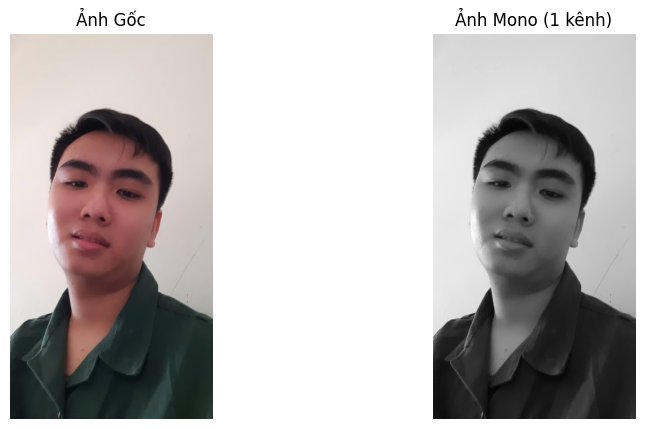

--- KẾT QUẢ DỰ ĐOÁN ---
Dự đoán là: Trần Trung Hiếu
Độ tin cậy: 99.49%

--- THÔNG TIN ---
MSSV: 31241022719
Quê quán: An Giang


In [ ]:
# Tải lại mô hình đã lưu
try:
    model = load_model('nhan_dien_thanh_vien_ann.h5')
    print("Tải lại mô hình thành công!")
except Exception as e:
    print(f"Lỗi: Không tìm thấy file model. Vui lòng đảm bảo bạn đã chạy bước huấn luyện và lưu model. Lỗi chi tiết: {e}")


def predict_image(image_path):
    """Hàm nhận đường dẫn ảnh, dự đoán và hiển thị kết quả (đã sửa lỗi)."""
    try:
        # Đọc và tiền xử lý ảnh
        img_original = Image.open(image_path)
        img_cv = cv2.imread(image_path)
        img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img_cv, (IMG_WIDTH, IMG_HEIGHT))
        img_normalized = img_resized / 255.0
        img_flattened = img_normalized.reshape(1, -1)

        # Dự đoán để lấy CHỈ SỐ (index) của lớp
        prediction = model.predict(img_flattened)
        predicted_class_index = np.argmax(prediction)

        # !!! SỬA LỖI TẠI ĐÂY !!!
        # Lấy tên chính xác từ danh sách CLASS_NAMES_ORDERED đã định nghĩa ở Bước 2
        predicted_class_name = CLASS_NAMES_ORDERED[predicted_class_index]

        confidence = np.max(prediction) * 100

        # Lấy thông tin chi tiết (bây giờ sẽ luôn hoạt động)
        info = member_info.get(predicted_class_name, "Lỗi: Không tìm thấy thông tin trong từ điển.")

        # Chuyển ảnh sang mono
        img_mono = cv2.cvtColor(img_cv, cv2.COLOR_RGB2GRAY)

        # --- Hiển thị kết quả ---
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img_original)
        plt.title("Ảnh Gốc")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(img_mono, cmap='gray')
        plt.title("Ảnh Mono (1 kênh)")
        plt.axis('off')
        plt.show()

        print("--- KẾT QUẢ DỰ ĐOÁN ---")
        print(f"Dự đoán là: {predicted_class_name}")
        print(f"Độ tin cậy: {confidence:.2f}%")
        print("\n--- THÔNG TIN ---")
        print(info)

    except Exception as e:
        print(f"Đã xảy ra lỗi trong quá trình dự đoán: {e}")

# --- Tải ảnh lên để kiểm tra ---
from google.colab import files
import time

print("\n\n--- VUI LÒNG TẢI ẢNH CẦN DỰ ĐOÁN LÊN ---")
# Thêm một chút delay để đảm bảo các lệnh print trước đó được hiển thị
time.sleep(1)
uploaded = files.upload()

# Lấy đường dẫn của ảnh vừa tải lên và dự đoán
for fn in uploaded.keys():
  predict_image(fn)

In [ ]:
# Bước 1: Cài đặt thư viện Gradio (nếu chưa có)
# Tùy chọn -q để quá trình cài đặt gọn gàng hơn
!pip install -q gradio

# Bước 2: Import các thư viện cần thiết
import gradio as gr
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image

# Bước 3: Tải lại mô hình và định nghĩa lại các hằng số
# (Làm như vậy để ô code này có thể chạy độc lập)

# Tải mô hình đã được huấn luyện
try:
    model = tf.keras.models.load_model('nhan_dien_thanh_vien_ann.h5')
except Exception as e:
    print(f"Lỗi quan trọng: Không thể tải file model 'nhan_dien_thanh_vien_ann.h5'. Hãy chắc chắn file này tồn tại trong thư mục Colab của bạn.")

# Kích thước ảnh đầu vào của mô hình
IMG_WIDTH = 100
IMG_HEIGHT = 100

# Định nghĩa lại danh sách tên LỚP THEO ĐÚNG THỨ TỰ BẢNG CHỮ CÁI
CLASS_NAMES_ORDERED = [
    "Lê Đăng Khôi",
    "Trần Gia Bảo",
    "Trần Trung Hiếu",
    "Trần Vân Anh"
]

# Định nghĩa lại từ điển thông tin thành viên
member_info = {
    "Lê Đăng Khôi": "MSSV: 31241020719\nQuê quán: TP. Hồ Chí Minh",
    "Trần Gia Bảo": "MSSV: 31241025886\nQuê quán: Hà Nội",
    "Trần Vân Anh": "MSSV: 31241024702\nQuê quán: Kiên Giang",
    "Trần Trung Hiếu": "MSSV: 31241022719\nQuê quán: An Giang"
}
# Bổ sung thông tin chung
common_info = "Sinh viên năm 2, ngành Công nghệ Logistics\nTrường Đại học Kinh tế TP. Hồ Chí Minh"


# Bước 4: Xây dựng hàm xử lý chính cho giao diện
def verify_and_convert(input_image):
    """
    Hàm này nhận ảnh đầu vào từ giao diện, thực hiện dự đoán,
    trả về ảnh mono và thông tin nhận diện.
    """
    if input_image is None:
        return None, "Vui lòng tải ảnh lên để bắt đầu."

    # 1. Tiền xử lý ảnh giống hệt lúc train
    img_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB) # Gradio đọc ảnh dạng BGR
    img_resized = cv2.resize(img_rgb, (IMG_WIDTH, IMG_HEIGHT))
    img_normalized = img_resized / 255.0
    img_flattened = img_normalized.reshape(1, -1)

    # 2. Dự đoán
    prediction = model.predict(img_flattened)
    predicted_index = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    # 3. Lấy thông tin
    predicted_name = CLASS_NAMES_ORDERED[predicted_index]
    personal_info = member_info.get(predicted_name, "Không có thông tin.")

    # 4. Định dạng chuỗi kết quả trả về
    result_text = (
        f"✅ KẾT QUẢ XÁC THỰC\n"
        f"---------------------------------\n"
        f"👤 Tên: {predicted_name}\n"
        f"🎯 Độ tin cậy: {confidence:.2f}%\n\n"
        f"📖 THÔNG TIN CHI TIẾT\n"
        f"---------------------------------\n"
        f"{personal_info}\n"
        f"{common_info}"
    )

    # 5. Chuyển ảnh gốc sang dạng mono (grayscale) để trả về
    mono_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    return mono_image, result_text


# Bước 5: Thiết kế và khởi chạy giao diện
# Sử dụng gr.Blocks để tùy chỉnh giao diện linh hoạt hơn
with gr.Blocks(theme=gr.themes.Soft(), css="footer {visibility: hidden}") as app:
    gr.Markdown(
        """
        <div style="text-align: center;">
            <h1 style="color: #333;">👁️ MonoVerify 👁️</h1>
            <p style="color: #555; font-size: 1.1em;">Hệ thống xác thực thành viên và chuyển đổi ảnh Mono</p>
        </div>
        """
    )

    with gr.Row():
        with gr.Column(scale=1):
            input_image = gr.Image(type="numpy", label="Tải ảnh của bạn lên đây", height=300)
            submit_btn = gr.Button("Xác thực ngay!", variant="primary")

        with gr.Column(scale=1):
            output_image = gr.Image(type="numpy", label="Ảnh Mono (1 kênh)", interactive=False, height=300)
            output_text = gr.Textbox(label="Kết quả xác thực", lines=8, interactive=False)

    gr.Markdown(
        """
        ---
        <p style="text-align: center; color: #888;">
        Thực hiện bởi: Nhóm 1 - Lớp Công nghệ Logistics UEH 🏫
        </p>
        <p style="text-align: center; color: #888;">
        Thành viên: Lê Đăng Khôi, Trần Gia Bảo, Trần Vân Anh, Trần Trung Hiếu
        </p>
        """
    )

    submit_btn.click(
        fn=verify_and_convert,
        inputs=input_image,
        outputs=[output_image, output_text]
    )

# Khởi chạy ứng dụng và tạo link chia sẻ
app.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://8988595db8deeb2f7b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://8988595db8deeb2f7b.gradio.live
